In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('./malaria_indicators_eth .csv')

In [3]:
df.head()

,GHO (CODE),GHO (DISPLAY),YEAR (CODE),REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),Numeric,Low,High
0,MALARIA_IRS_COVERAGE,Number of people protected from malaria by ind...,2018,AFR,Africa,ETH,Ethiopia,10486854.0,NaN,NaN
1,MALARIA_IRS_COVERAGE,Number of people protected from malaria by ind...,2019,AFR,Africa,ETH,Ethiopia,7782034.0,NaN,NaN
2,MALARIA_IRS_COVERAGE,Number of people protected from malaria by ind...,2020,AFR,Africa,ETH,Ethiopia,6349834.0,NaN,NaN
3,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,2010,AFR,Africa,ETH,Ethiopia,390252.0,NaN,NaN
4,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,2011,AFR,Africa,ETH,Ethiopia,665813.0,NaN,NaN


In [4]:
df = df.drop(['Low', 'High'], axis=1)

In [5]:
df.head()

,GHO (CODE),GHO (DISPLAY),YEAR (CODE),REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),Numeric
0,MALARIA_IRS_COVERAGE,Number of people protected from malaria by ind...,2018,AFR,Africa,ETH,Ethiopia,10486854.0
1,MALARIA_IRS_COVERAGE,Number of people protected from malaria by ind...,2019,AFR,Africa,ETH,Ethiopia,7782034.0
2,MALARIA_IRS_COVERAGE,Number of people protected from malaria by ind...,2020,AFR,Africa,ETH,Ethiopia,6349834.0
3,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,2010,AFR,Africa,ETH,Ethiopia,390252.0
4,MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,2011,AFR,Africa,ETH,Ethiopia,665813.0


In [6]:
summary_dict = {}

for code in df['GHO (CODE)'].unique():
    code_str = code.split()[0]
    
    subset = df[df['GHO (CODE)'] == code]
    
    gho_disp = subset['GHO (DISPLAY)'].apply(lambda x: re.sub(r'\d+', '', x))
    
    mode_values = subset['Numeric'].mode()
    mode_value = mode_values.iloc[0] if not mode_values.empty else None
    mean_value = subset['Numeric'].mean()
    median_value = subset['Numeric'].median()
    
    summary_dict[code_str] = {'GHO Display': gho_disp.unique()[0] , 'mode': mode_value, 'mean': mean_value, 'median': median_value}



/home/natinael/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [7]:
summary_df = pd.DataFrame(summary_dict).T

In [8]:
summary_df

,GHO Display,mode,mean,median
MALARIA_IRS_COVERAGE,Number of people protected from malaria by ind...,6349834.0,8206240.666667,7782034.0
MALARIA_PV_INDIG,Number of indigenous P. vivax malaria cases,102412.0,535206.0,576269.0
MALARIA_MICR_POS,Number of malaria positive cases by microscopy,904495.0,1623697.727273,1692578.0
MALARIA_EST_CASES,Estimated number of malaria cases,2645193.0,9656740.0,9642445.5
MALARIA_1STLINE_TREATED,Number of malaria cases treated with any first...,748601.0,1091939.75,1080177.0
MALARIA_ACT_TREATED,Number of malaria cases treated with artemisin...,836293.0,1053385.0,1126731.0
MALARIA_CONF_CASES,Number of confirmed malaria cases,392377.0,1145434.0,1036316.0
MALARIA_EST_DEATHS,Estimated number of malaria deaths,5708.0,17169.590909,17116.0
MALARIA_EST_INCIDENCE,Estimated malaria incidence (per population a...,34.08666,166.676901,169.666185
MALARIA_EST_MORTALITY,Estimated malaria mortality rate (per popula...,7.35548,29.496564,29.81824


In [10]:
extreme_values = {}

for code in df['GHO (CODE)'].unique():
    subset = df[df['GHO (CODE)'] == code]
    max_value = 0
    min_value = float('inf')
    year_max_value = None
    year_min_value = None
    
    for index, row in subset.iterrows():
        if row['Numeric'] > max_value:
            max_value = row['Numeric']
            year_max_value = row['YEAR (CODE)']
        
        if row['Numeric'] < min_value:
            min_value = row['Numeric']
            year_min_value = row['YEAR (CODE)']
    
    extreme_values[code] = {'max_value': max_value, 'year_max_value': year_max_value, 'min_value': min_value, 'year_min_value': year_min_value}

for code, values in extreme_values.items():
    print(f"For GHO (CODE) {code}:")
    print(f"Year with the highest number of cases: {values['year_max_value']}, Maximum value: {values['max_value']}")
    print(f"Year with the lowest number of cases: {values['year_min_value']}, Minimum value: {values['min_value']}")
    print()


For GHO (CODE) MALARIA_IRS_COVERAGE:
Year with the highest number of cases: 2018, Maximum value: 10486854.0
Year with the lowest number of cases: 2020, Minimum value: 6349834.0

For GHO (CODE) MALARIA_PV_INDIG:
Year with the highest number of cases: 2013, Maximum value: 958291.0
Year with the lowest number of cases: 2018, Minimum value: 102412.0

For GHO (CODE) MALARIA_MICR_POS:
Year with the highest number of cases: 2013, Maximum value: 2645454.0
Year with the lowest number of cases: 2019, Minimum value: 904495.0

For GHO (CODE) MALARIA_EST_CASES:
Year with the highest number of cases: 2013, Maximum value: 15281540.0
Year with the lowest number of cases: 2019, Minimum value: 2645193.0

For GHO (CODE) MALARIA_1STLINE_TREATED:
Year with the highest number of cases: 2020, Maximum value: 1458804.0
Year with the lowest number of cases: 2018, Minimum value: 748601.0

For GHO (CODE) MALARIA_ACT_TREATED:
Year with the highest number of cases: 2020, Maximum value: 1197131.0
Year with the lowes

In [11]:
summary_df_extr = pd.DataFrame(extreme_values).T

In [12]:
summary_df_extr

,max_value,year_max_value,min_value,year_min_value
MALARIA_IRS_COVERAGE,1.048685e+07,2018.0,6.349834e+06,2020.0
MALARIA_PV_INDIG,9.582910e+05,2013.0,1.024120e+05,2018.0
MALARIA_MICR_POS,2.645454e+06,2013.0,9.044950e+05,2019.0
MALARIA_EST_CASES,1.528154e+07,2013.0,2.645193e+06,2019.0
MALARIA_1STLINE_TREATED,1.458804e+06,2020.0,7.486010e+05,2018.0
MALARIA_ACT_TREATED,1.197131e+06,2020.0,8.362930e+05,2019.0
MALARIA_CONF_CASES,2.645454e+06,2013.0,3.923770e+05,2001.0
MALARIA_EST_DEATHS,2.702400e+04,2013.0,5.708000e+03,2019.0
MALARIA_EST_INCIDENCE,3.294404e+02,2000.0,3.408666e+01,2019.0
MALARIA_EST_MORTALITY,5.530293e+01,2000.0,7.355480e+00,2019.0


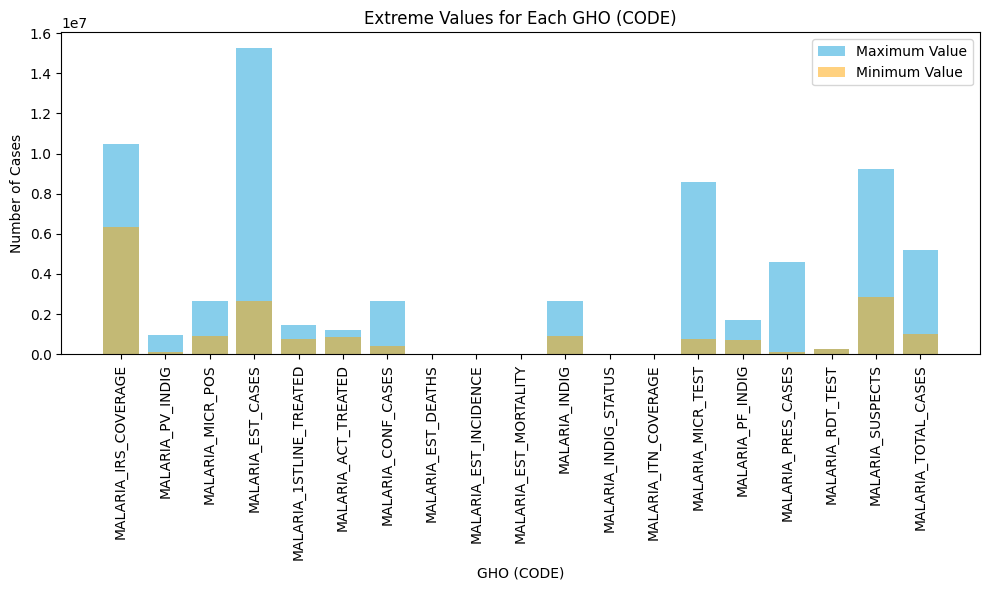

In [13]:

codes = list(extreme_values.keys())
max_values = [values['max_value'] for values in extreme_values.values()]
min_values = [values['min_value'] for values in extreme_values.values()]

plt.figure(figsize=(10, 6))
plt.bar(codes, max_values, color='skyblue', label='Maximum Value')
plt.bar(codes, min_values, color='orange', alpha=0.5, label='Minimum Value')

plt.xlabel('GHO (CODE)')
plt.ylabel('Number of Cases')
plt.title('Extreme Values for Each GHO (CODE)')
plt.legend()

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [14]:

# hover text with year information
max_hover_text = [f'Maximum Value: {max_val}<br>Year: {extreme_values[code]["year_max_value"]}' for code, max_val in zip(codes, max_values)]
min_hover_text = [f'Minimum Value: {min_val}<br>Year: {extreme_values[code]["year_min_value"]}' for code, min_val in zip(codes, min_values)]

# traces for hover text
max_trace = go.Scatter(x=codes, y=max_values, mode='markers', name='Maximum Value',
                       marker=dict(color='skyblue'), text=max_hover_text, hoverinfo='text')
min_trace = go.Scatter(x=codes, y=min_values, mode='markers', name='Minimum Value',
                       marker=dict(color='orange'), text=min_hover_text, hoverinfo='text')

# layout
layout = go.Layout(title='Extreme Values for Each GHO (CODE) by Year',
                   xaxis=dict(title='GHO (CODE)'),
                   yaxis=dict(title='Number of Cases'))

# figure
fig = go.Figure(data=[max_trace, min_trace], layout=layout)

# plot
fig.show()
